In [1]:
pip install folium, geopandas

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'folium,'


# 1. Problem Domain and Data Preparation

<b>Description of Problem Domain:</b>

The problem domain revolves around predicting CO2 emissions in Rwanda. This is crucial for environmental management and policy-making, especially as countries work towards reducing their carbon footprints in line with global climate goals.

<b>Motivation</b>: 
Understanding CO2 emissions helps in assessing the impact of various sectors on climate change and in formulating strategies to mitigate these effects.

<b>Dataset</b>
The dataset comprises open-source emissions data from Sentinel-5P satellites, covering the years 2019 to 2021.

<b>Challenges Faced</b>
1. Missing Values: Often, datasets have incomplete information.
2. Outliers: Certain data points may not fit the expected range and can skew results.
3. Data Size: Handling large datasets can be computationally intensive.

In [1]:
# importing required libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

from sklearn.preprocessing import OneHotEncoder

import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Data loading and overview

In [2]:
data = pd.read_csv('data/train.csv')
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,-130.050797,35.874496,-0.000027,0.035370,1589.024536,4061.098145,829530.500000,71.111977,52.775928,-149.875565,25.965214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,0.863230,0.000038,0.255668,35.874496,-130.050797,50.843559,-98.593887,-1.280761,829864.546875,-12.628979,35.632416,-138.786446,30.752128,0.115927,2.506609,0.295663,225.731144,0.595473,-12.628979,35.632416,-138.786446,30.752128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,-140.874435,28.965133,0.000012,0.036526,1772.574405,1869.040414,829787.287130,-1.019594,38.982368,-140.158048,29.562000,0.000047,1.639765e-05,0.00003,0.000093,7311.869141,-1.935386,0.067038,829859.960368,5.471037,35.265195,-138.343908,30.054262,0.000170,1.172826,0.000143,0.200754,29.071781,-141.814827,43.050213,4.678839,-1.548119,829747.856973,16.152492,43.485327,-142.786141,28.573627,0.116775,2.657704,0.315733,226.172170,0.175166,24.464335,42.596541,-143.097868,28.213655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.

In [3]:
data.shape

(79023, 76)

In [4]:
data.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,UvAerosolLayerHeight_aerosol_height,UvAerosolLayerHeight_aerosol_pressure,UvAerosolLayerHeight_aerosol_optical_depth,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,76901.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,60703.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,71746.000000,78484.000000,78484.000000,78484.000000,78484.000000,78484.000000,78484.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,78475.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,-83.833174,27.722311,0.000015,0.033158,2113.906233,2821.590722,829938.633762,-7.331051,37.846794,-86.049580,27.767024,0.000044,0.000012,0.000032,0.000097,8922.568995,-1.812155,0.097008,829994.224471,-15.937696,36.852637,-84.260082,28.316388,0.000127,1.254134,0.000084,0.228801,27.887813,-84.605844,40.478057,-9.396089,-1.342787,829974.542096,-12.739997,39.962875,-86.548895,28.052553,0.117343,2.609890,0.310802,228.625917,0.569107,-13.1087

Data cleaning


In [5]:
# dropped features with more than 90 percentage missing values
data.dropna(thresh=len(data)*0.1, axis=1, inplace=True)
data.shape

(79023, 69)

In [16]:
# fill missing data
data = data.ffill().bfill()
data.isna().sum().sum()

0

In [17]:
# dropped duplicates
data.drop_duplicates(inplace=True)
data.shape

(79023, 72)

In [18]:
# categorical data
categorical_data = ['latitude', 'longitude', 'year', 'week_no']
for column in categorical_data:
    data[column] = data[column].astype('category')

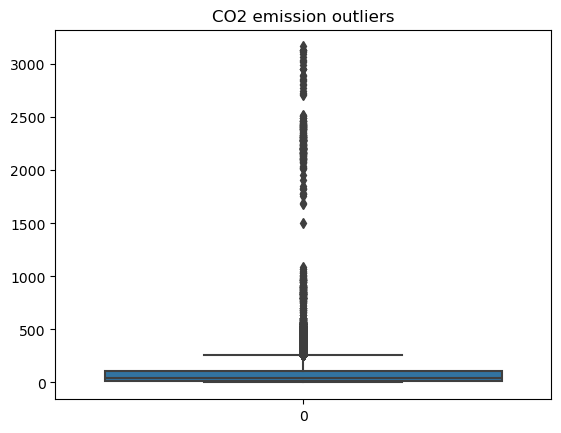

In [19]:
# Outliers: Sudden spikes in emissions data could be erroneous or due to unusual events.
sns.boxplot(data.emission)
plt.title('CO2 emission outliers')  
plt.show()

# 2. Exploratory Data Analysis (EDA)

Locations

In [20]:
locations = (
    data.groupby(['latitude', 'longitude']).size()
    .sort_values(ascending=False)
    .reset_index(drop=False)
    .rename({0:'number_of_occurence'},axis=1)
)
locations.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6988\3324091482.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['latitude', 'longitude']).size()


,latitude,longitude,number_of_occurence
0,-1.882,28.718,159
1,-2.896,29.404,159
2,-2.432,29.568,159
3,-0.986,30.214,159
4,-1.889,29.611,159


Geo Visualization

In [21]:
geometry = gpd.points_from_xy(data.longitude, data.latitude)
geo_df = gpd.GeoDataFrame(
    data[["latitude", "longitude"]], geometry=geometry
)
geo_df.head()

,latitude,longitude,geometry
0,-0.51,29.29,POINT (29.29 -0.51)
1,-0.51,29.29,POINT (29.29 -0.51)
2,-0.51,29.29,POINT (29.29 -0.51)
3,-0.51,29.29,POINT (29.29 -0.51)
4,-0.51,29.29,POINT (29.29 -0.51)


In [ ]:
m = folium.Map(location=[data['latitude'].iloc[0], data['longitude'].iloc[0]], prefer_canvas=True)

for idx, row in data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=1,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)
m

Descriptive Statistics

In [22]:
data.describe()

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,month,is_covid,is_lockdown
count,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000
mean,0.000050,0.838251,0.000037,0.160018,-7.074613,36.902615,-86.417731,27.693951,0.000016,0.033165,2120.567440,2830.036998,829937.789414,-7.294075,37.798347,-86.949457,27.792888,0.000044,0.000012,0.000032,0.000097,8909.125704,-1.832277,0.098572,829991.787088,-14.674594,36.339245,-86.462104,28.313738,0.000126,1.258680,0.000083,0.231325,27.919413,-86.686702,40.344966,-8.917880,-1.339532,829974.159160,-12.809728,39.975150,-86.889442,28.081350,0.117304,2.610550,0.310771,228.613004,0.571440,-13.177950,39.820870,-86.875807,28.132892,0.599533,53050.634762,5598.769546,59383.845080,4676.358194,19.301598,0.271465,-10.853386,40.446378,-87.103540,27.953063,81.940552,6.452830,0.308176,0.056604
std,0.000282,0.187310,0.000215,0.073079,66.073641,14.696670,38.404774,5.512574,0.000094,0.006026,627.201934,794.101726,172.398129,47.135182,10.611761,38.069191,4.913281,0.000010,0.000008,0.000004,0.000019,882.577551,0.684750,0.

Correlation Analysis

In [23]:
abs(data.drop(columns=['ID_LAT_LON_YEAR_WEEK'], axis=1).corr()['emission']).sort_values(ascending = False).head(10)

emission                                                    1.000000
longitude                                                   0.102746
Cloud_surface_albedo                                        0.048290
CarbonMonoxide_H2O_column_number_density                    0.048042
CarbonMonoxide_CO_column_number_density                     0.042197
is_covid                                                    0.035689
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.033572
SulphurDioxide_SO2_column_number_density_15km               0.031305
Formaldehyde_tropospheric_HCHO_column_number_density        0.030744
SulphurDioxide_SO2_slant_column_number_density              0.029917
Name: emission, dtype: float64

Categorical Analysis

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6988\4022627982.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(column)['emission'].mean().sort_values(ascending=False).head(10)


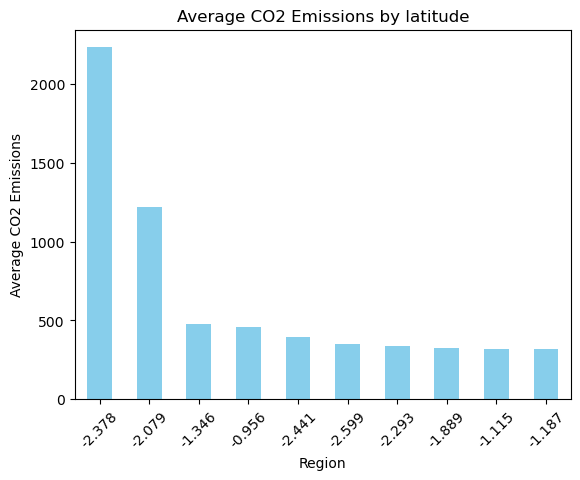

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6988\4022627982.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(column)['emission'].mean().sort_values(ascending=False).head(10)


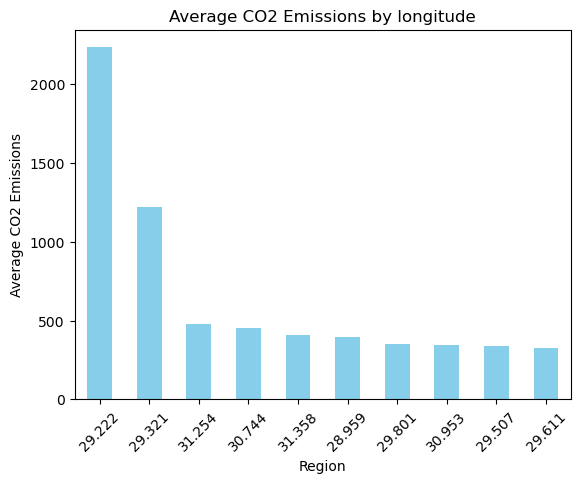

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6988\4022627982.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(column)['emission'].mean().sort_values(ascending=False).head(10)


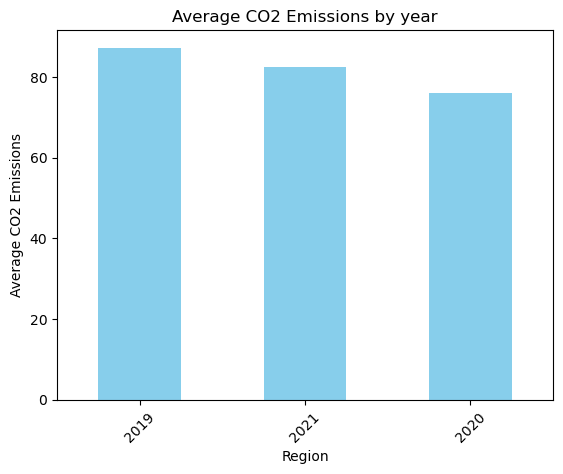

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6988\4022627982.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(column)['emission'].mean().sort_values(ascending=False).head(10)


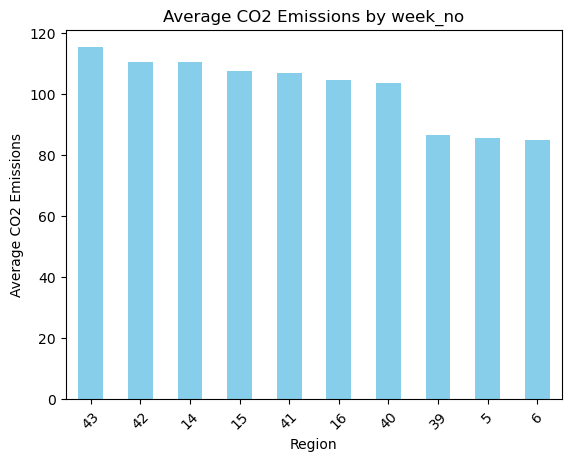

In [24]:
def cat_colum(column):
    grouped_data = data.groupby(column)['emission'].mean().sort_values(ascending=False).head(10)
    grouped_data.plot(kind='bar', color='skyblue')
    plt.title(f'Average CO2 Emissions by {column}')
    plt.xlabel('Region')
    plt.ylabel('Average CO2 Emissions')
    plt.xticks(rotation=45)
    plt.show()
    
for column in categorical_data:
    cat_colum(column)

Feature Engineering

In [25]:
coordinates = [str(row[0]) + '_' + str(row[1]) for _, row in data[['latitude', 'longitude']].drop_duplicates().iterrows()]
coords = dict(zip(coordinates, range(len(coordinates))))


data['month'] = data[['year', 'week_no']].apply(lambda row: datetime.datetime.strptime(f'{row["year"]}-{row["week_no"]+1}-1', "%Y-%W-%w").month, axis=1)
data['is_covid'] = (data['year'] == 2020) & (data['month'] > 2) | (data['year'] == 2021) & (data['month'] == 1)
data['is_covid'] = data['is_covid'].astype(np.int64)
data['is_lockdown'] = (data['year'] == 2020) & ((data['month'].isin([3,4]))) 
data['is_lockdown'] = data['is_lockdown'].astype(np.int64)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_6988\353150399.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coordinates = [str(row[0]) + '_' + str(row[1]) for _, row in data[['latitude', 'longitude']].drop_duplicates().iterrows()]


# 3. Encoding Scheme & PCA for Dimensionality Reduction

Encoding Scheme

In [26]:
X = data.drop(columns=['ID_LAT_LON_YEAR_WEEK', 'emission'], axis=1)
y = data['emission']

categorical_data = X.select_dtypes(include=['category']).columns.tolist()
onehot_encoder = OneHotEncoder(drop='first')
encoded_data = onehot_encoder.fit_transform(X[categorical_data])
X = X.drop(columns=categorical_data).reset_index(drop=True)
data_encoded = pd.concat([X, pd.DataFrame(encoded_data.toarray(), columns=onehot_encoder.get_feature_names_out(categorical_data))], axis=1)
data_encoded.shape

(79023, 1023)

Dimensinality Reduction

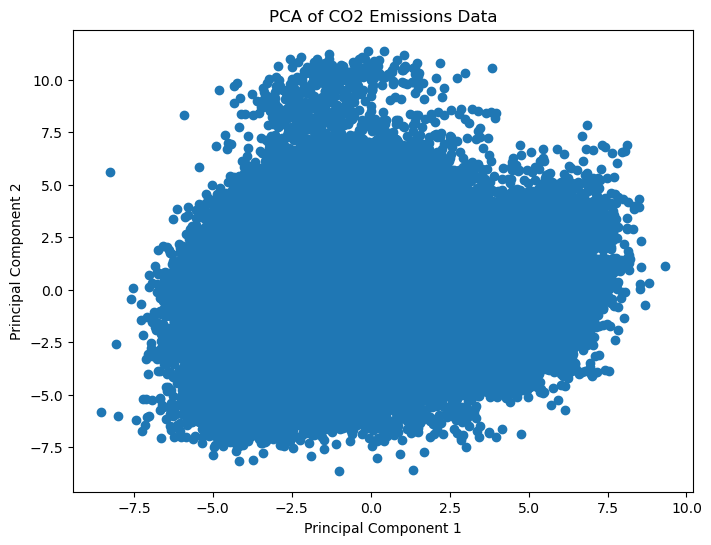

Explained Variance Ratio: [0.15362109 0.11052877]


In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize PCA results
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of CO2 Emissions Data')
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)